# Student Performance Indicator

## Life cycle of Machine Learning Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

### 1) Problem statement

* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2) Data Collection

* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data
The data consists of 8 column and 1000 rows.

In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [172]:
pwd

'/Users/basazinbelhu/CompleteGenericmlProjeccts/notebook'

In [173]:
# Load the data
df = pd.read_csv('./data/StudentsPerformance.csv')


In [174]:
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns = df.columns.str.replace("/", "_").str.lower()

In [175]:
print(df.head())
print(f"Shape: {df.shape}")

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
Shape: (1000, 8)


## 2.2 Dataset information
* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

# 3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

In [176]:
# Missing values
print(df.isnull().sum())

# Data types
print(df.dtypes)
print("Dupllicate Check:", df.duplicated().sum())
# Unique values in categorical columns
categorical_cols = categorical_cols = df.select_dtypes(include=['object', 'category'])
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")



gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64
gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object
Dupllicate Check: 0
gender: ['female' 'male']
race_ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test_preparation_course: ['none' 'completed']


## Statistics for categorical cols

In [177]:
df.describe(include=['object', 'category'])

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


### Descriptive statistics

In [178]:

print(df.describe())

       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


### Insight
* Students score close each other, balanced score
* The score distribution between subjects closer because they have similar std and mean
* All subjects have max of 100 which means there are students who have complete scores

### Exploring Data

In [179]:
# Get lists of feature names
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['math_score', 'reading_score', 'writing_score']
Categorical Features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [180]:
# Add 'Total Score' column
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

# Add 'Average' column
df['average'] = df['total_score'] / 3

In [181]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [182]:
math_full = df[df['math_score']==100]['average'].count()
read_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()

In [183]:
print(f"Number of students who score complete math score {math_full}")
print(f"Number of students who score complete reading score {read_full}")
print(f"Number of students who score complete writing score {writing_full}")

Number of students who score complete math score 7
Number of students who score complete reading score 17
Number of students who score complete writing score 14


In [184]:
df.columns


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

In [185]:
math_less_than40 = df[df['math_score']<=40]['average'].count()
read_less_than40 = df[df['reading_score']<=40]['average'].count()
write_less_than40 = df[df['writing_score']<=40]['average'].count()


In [186]:
print(f"Number of students who socre less than 40 on math {math_less_than40}")
print(f"Number of students who socre less than 40 on math {read_less_than40}")
print(f"Number of students who socre less than 40 on math {write_less_than40}")

Number of students who socre less than 40 on math 50
Number of students who socre less than 40 on math 27
Number of students who socre less than 40 on math 35


In [187]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## 4. Exploring Data ( Visualization )

### 4.1 Visualize average score distribution to make some conclusion.

* Histogram
* Kernel Distribution Function (KDE)

In [189]:
class StudentVisualizer:
    def __init__(self, df):
        self.df = df

    def plot_avg_histograms(self, figsize=(12, 6)):
        fig, axs = plt.subplots(1, 2, figsize=figsize)
        fig.suptitle("Average Scores Distribution", fontsize=16)  # Figure-level title

        # First histogram
        sns.histplot(data=self.df, x='average', bins=30, kde=True, color='b', ax=axs[0])
        axs[0].set_title("Overall Average Distribution")

        # Second histogram
        sns.histplot(data=self.df, x='average', bins=30, kde=True, hue='gender', ax=axs[1])
        axs[1].set_title("Average Distribution by Gender")

        plt.tight_layout()
        plt.show()

    def hist_by_group(self, x, hue, gender_split=False, figsize=(25,6), main_title=None):
        if gender_split:
            fig, axs = plt.subplots(1, 3, figsize=figsize)
            if main_title:
                fig.suptitle(main_title, fontsize=16)

            sns.histplot(data=self.df, x=x, kde=True, hue=hue, ax=axs[0])
            axs[0].set_title(f"All Students - {hue}")

            sns.histplot(data=self.df[self.df.gender=='female'], x=x, kde=True, hue=hue, ax=axs[1])
            axs[1].set_title(f"Female Students - {hue}")

            sns.histplot(data=self.df[self.df.gender=='male'], x=x, kde=True, hue=hue, ax=axs[2])
            axs[2].set_title(f"Male Students - {hue}")
        else:
            fig, ax = plt.subplots(figsize=figsize)
            if main_title:
                ax.set_title(main_title, fontsize=16)
            sns.histplot(data=self.df, x=x, kde=True, hue=hue, ax=ax)

        plt.tight_layout()
        plt.show()

    def violin_scores(self, score_cols=['math score','reading score','writing score'], figsize=(18,8)):
        fig, axs = plt.subplots(1, len(score_cols), figsize=figsize)
        fig.suptitle("Score Distributions (Violin Plots)", fontsize=16)  # Figure-level title

        for ax, col in zip(axs, score_cols):
            sns.violinplot(y=col, data=self.df, linewidth=3, ax=ax)
            ax.set_title(col.upper())

        plt.tight_layout()
        plt.show()
    def plot_categorical_pies(self, figsize=(30, 12), colors_palette='tab20'):
        """
        Automatically plot pie charts for all categorical columns in a DataFrame.
        """
        # Get categorical columns
        cat_cols = self.df.select_dtypes(include=['object', 'category']).columns
        n = len(cat_cols)
        if n == 0:
            print("No categorical columns found.")
            return

        plt.figure(figsize=figsize)
        
        for i, col in enumerate(cat_cols, 1):
            plt.subplot(1, n, i)
            counts = self.df[col].value_counts()

            # Generate enough colors for this column
            colors = sns.color_palette(colors_palette, len(counts))

            plt.pie(counts, labels=counts.index, autopct='%.2f%%', colors=colors)
            plt.title(col.replace('_', ' ').title(), fontsize=16)
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()
    def plot_boxplots(self, numeric_cols, group_by_cols):
        """
        Plot boxplots of numeric scores by categorical variables
        
        Parameters:
        - numeric_cols: list of numeric columns to plot (y-axis)
        - group_by_cols: list of categorical columns to group by (x-axis)
        """
        for num_col in numeric_cols:
            for group_col in group_by_cols:
                plt.figure(figsize=(8, 6))
                sns.boxplot(x=group_col, y=num_col, data=self.df)
                plt.title(f"{num_col} by {group_col}")
                plt.xticks(rotation=45)
                plt.tight_layout()  # Added to prevent label cutoff
                plt.show()

In [190]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

## Visualizations

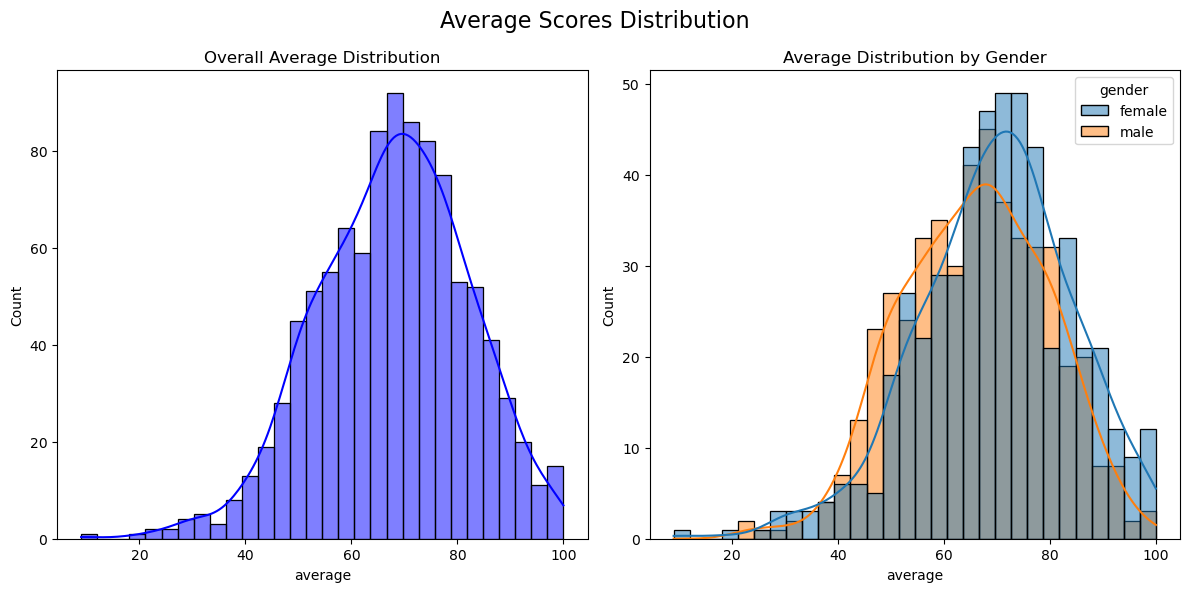

In [191]:
viz = StudentVisualizer(df)
viz.plot_avg_histograms()

* Female students score better grade than mean


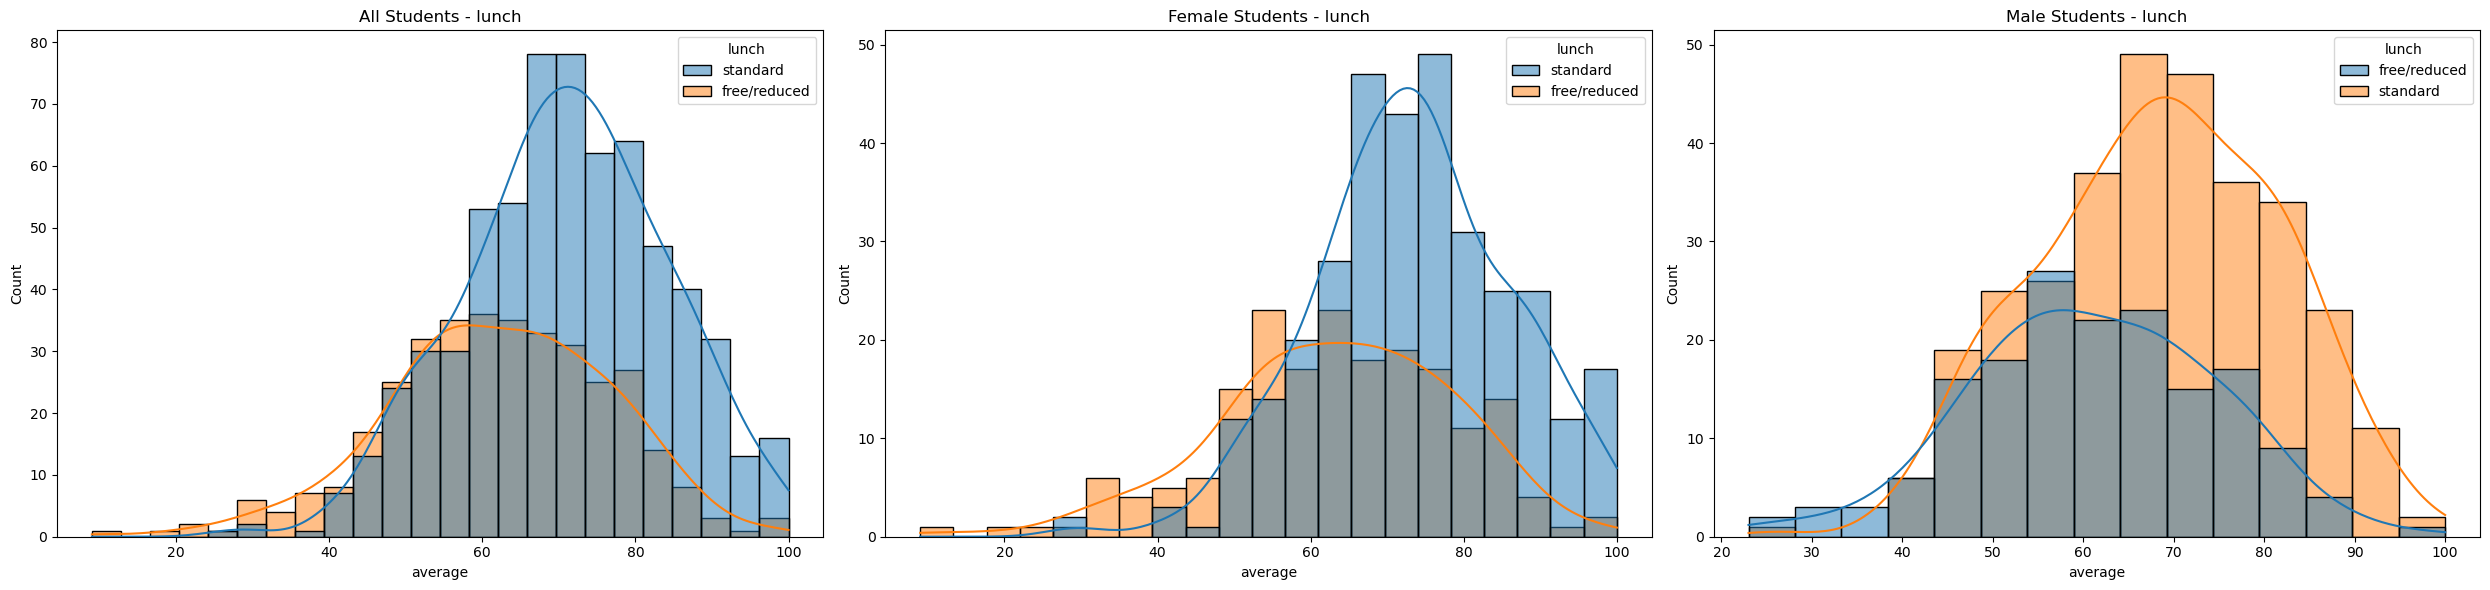

In [192]:
viz.hist_by_group(x='average', hue='lunch', gender_split=True)

* Students who have standard lunch perform bettern than students who does not or reduced lunch
* Standard lunch helps both female and male students to do better on exams

#### parental level of education

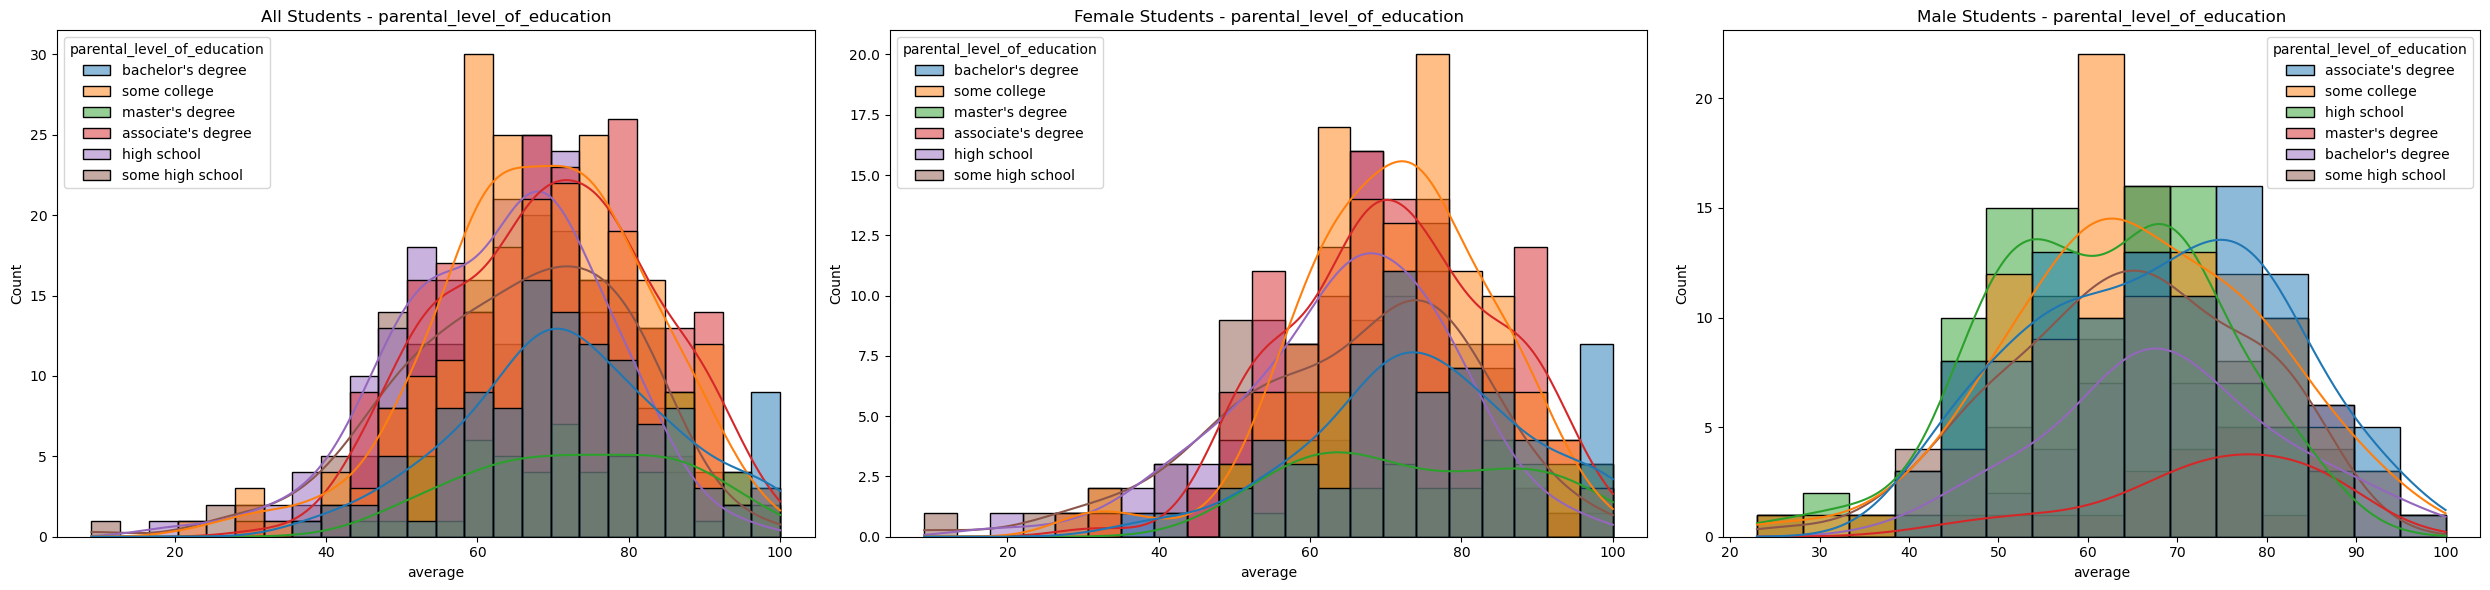

In [193]:
viz.hist_by_group(x='average', hue='parental_level_of_education', gender_split=True)

* Over all students performance does note have clear association with parent education level
* Students whose parent have some college and associate's degree shows some improved performance

### race/ethnicity

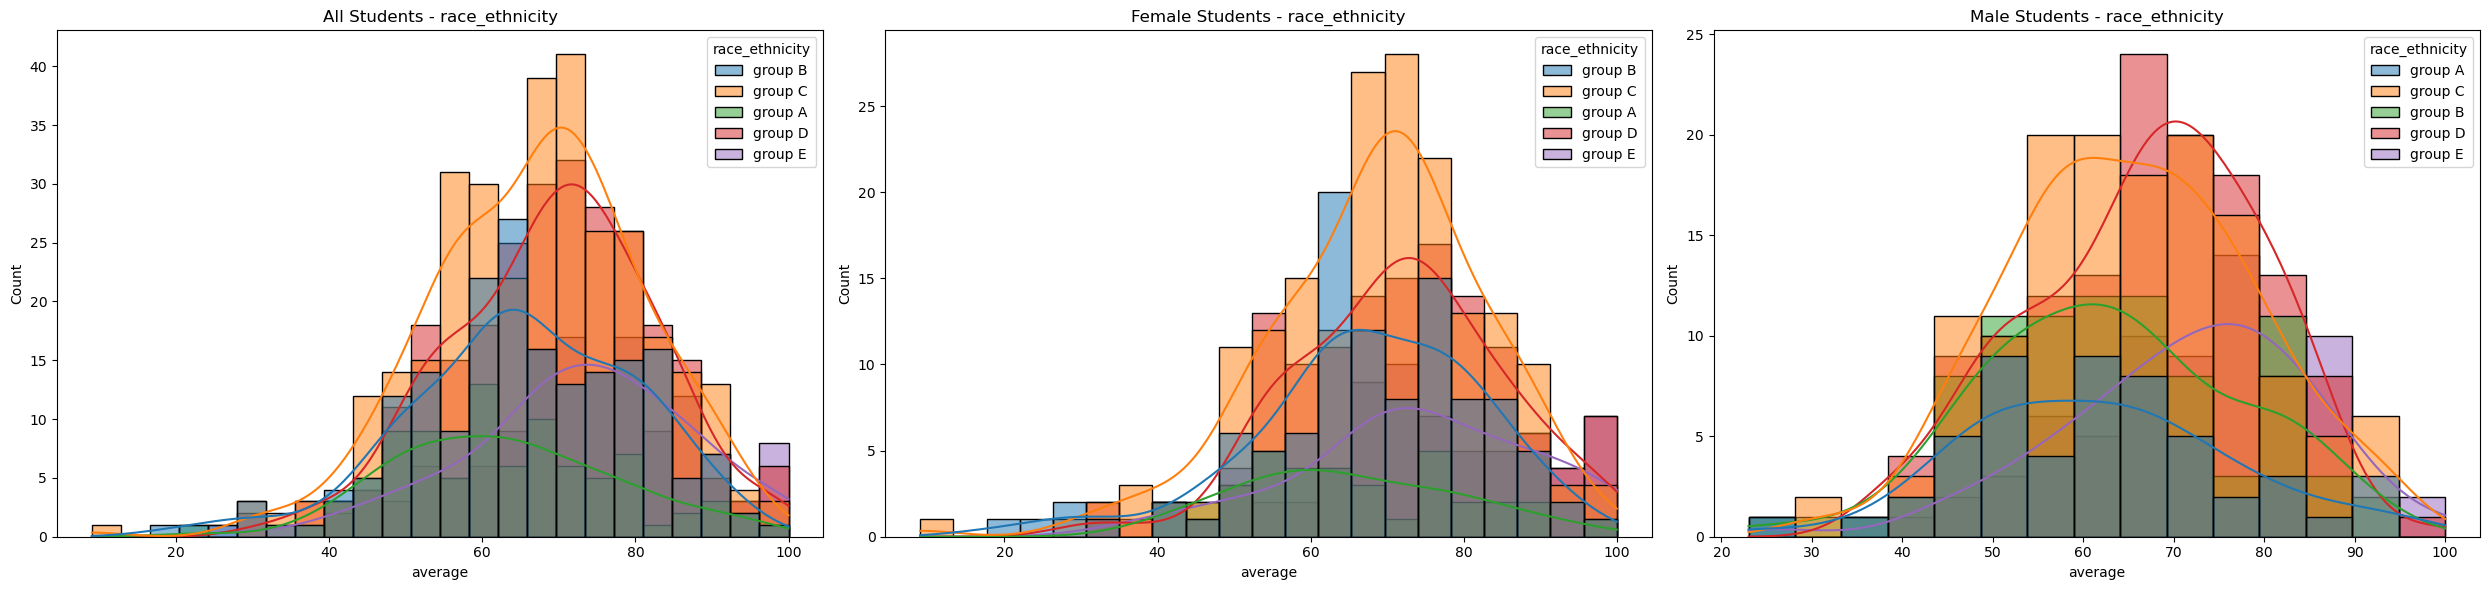

In [194]:
viz.hist_by_group(x='average', hue='race_ethnicity', gender_split=True)

* Race/ethnicity group C perform better than other groups followed by group D in overall
* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### Maximumum score of students in all three subjects

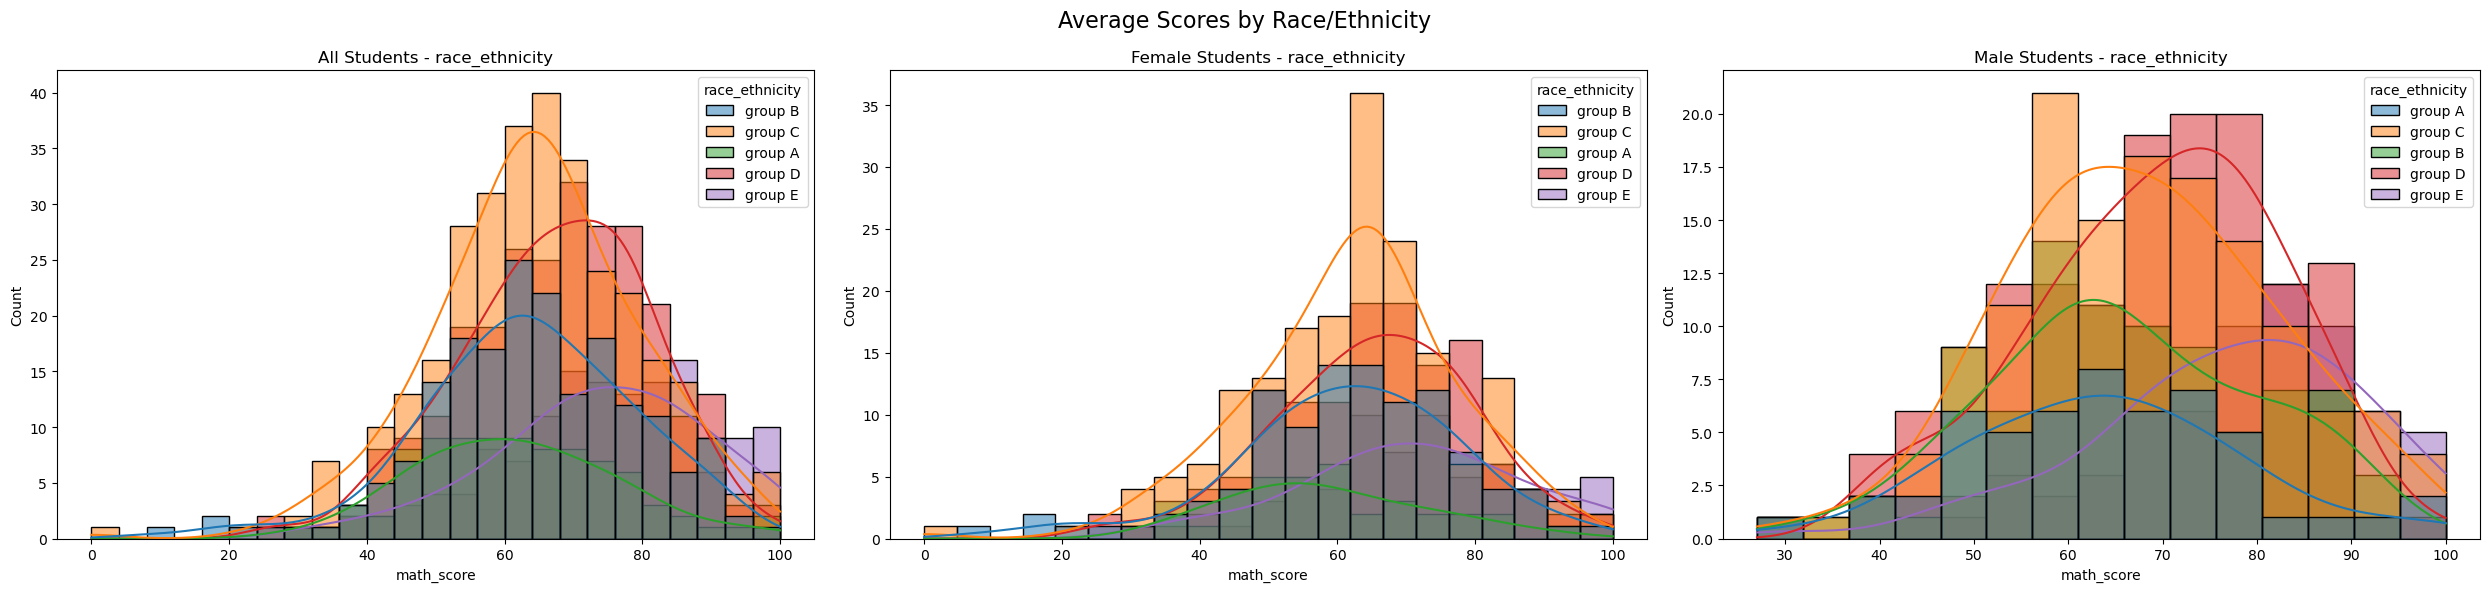

In [195]:
viz.hist_by_group(x='math_score', hue='race_ethnicity', gender_split=True, main_title="Average Scores by Race/Ethnicity")


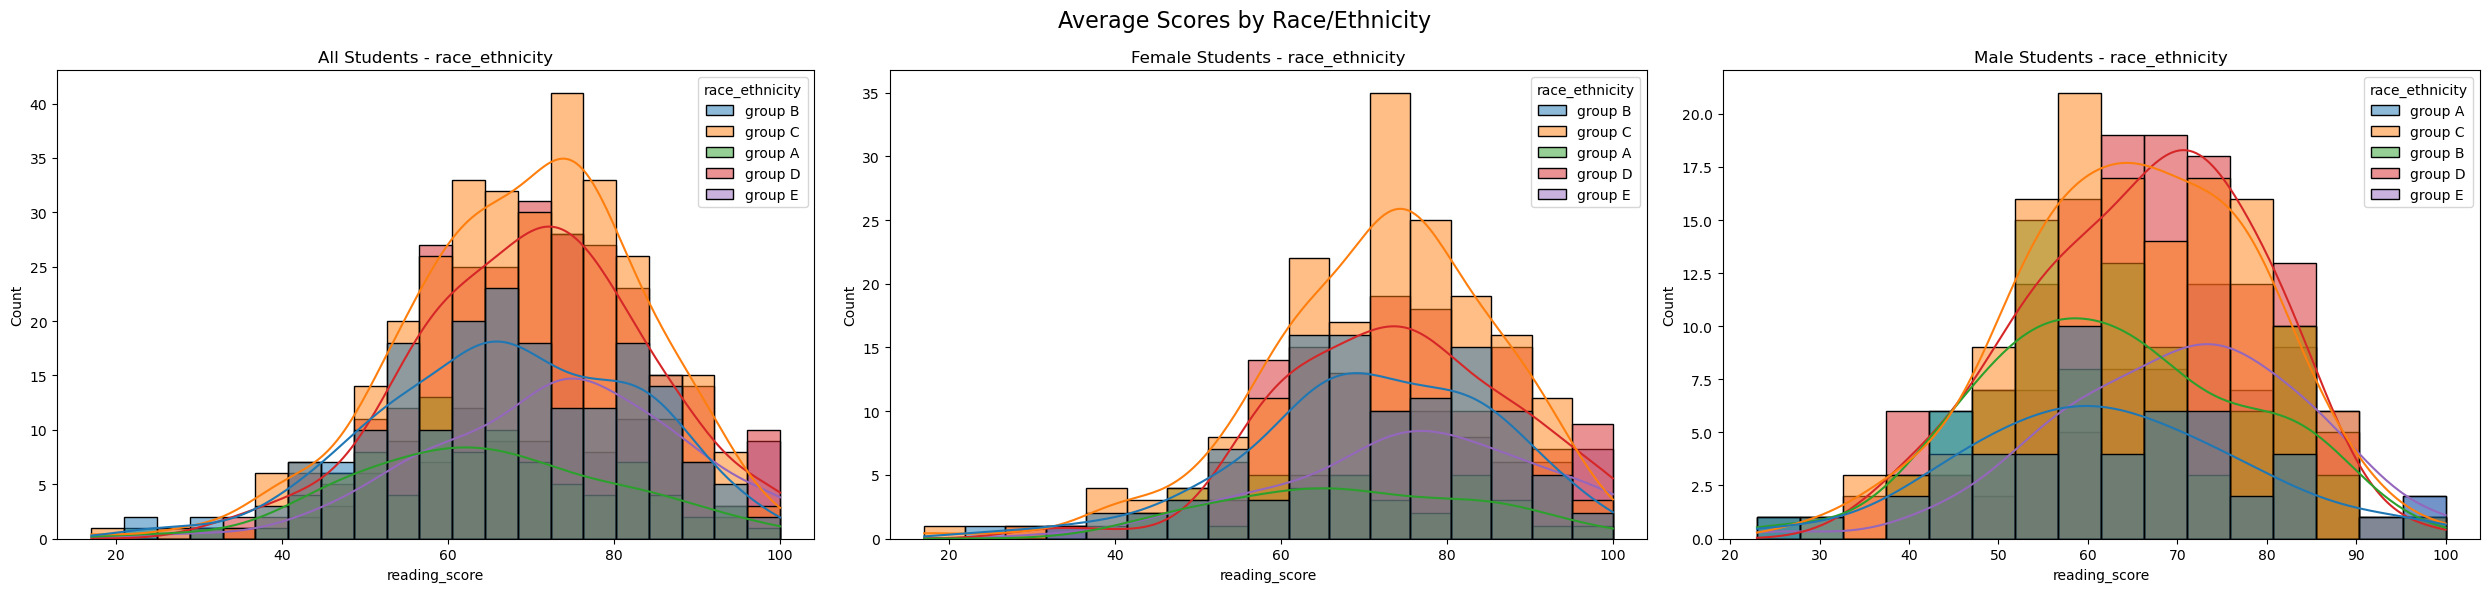

In [196]:
viz.hist_by_group(x='reading_score', hue='race_ethnicity', gender_split=True, main_title="Average Scores by Race/Ethnicity")


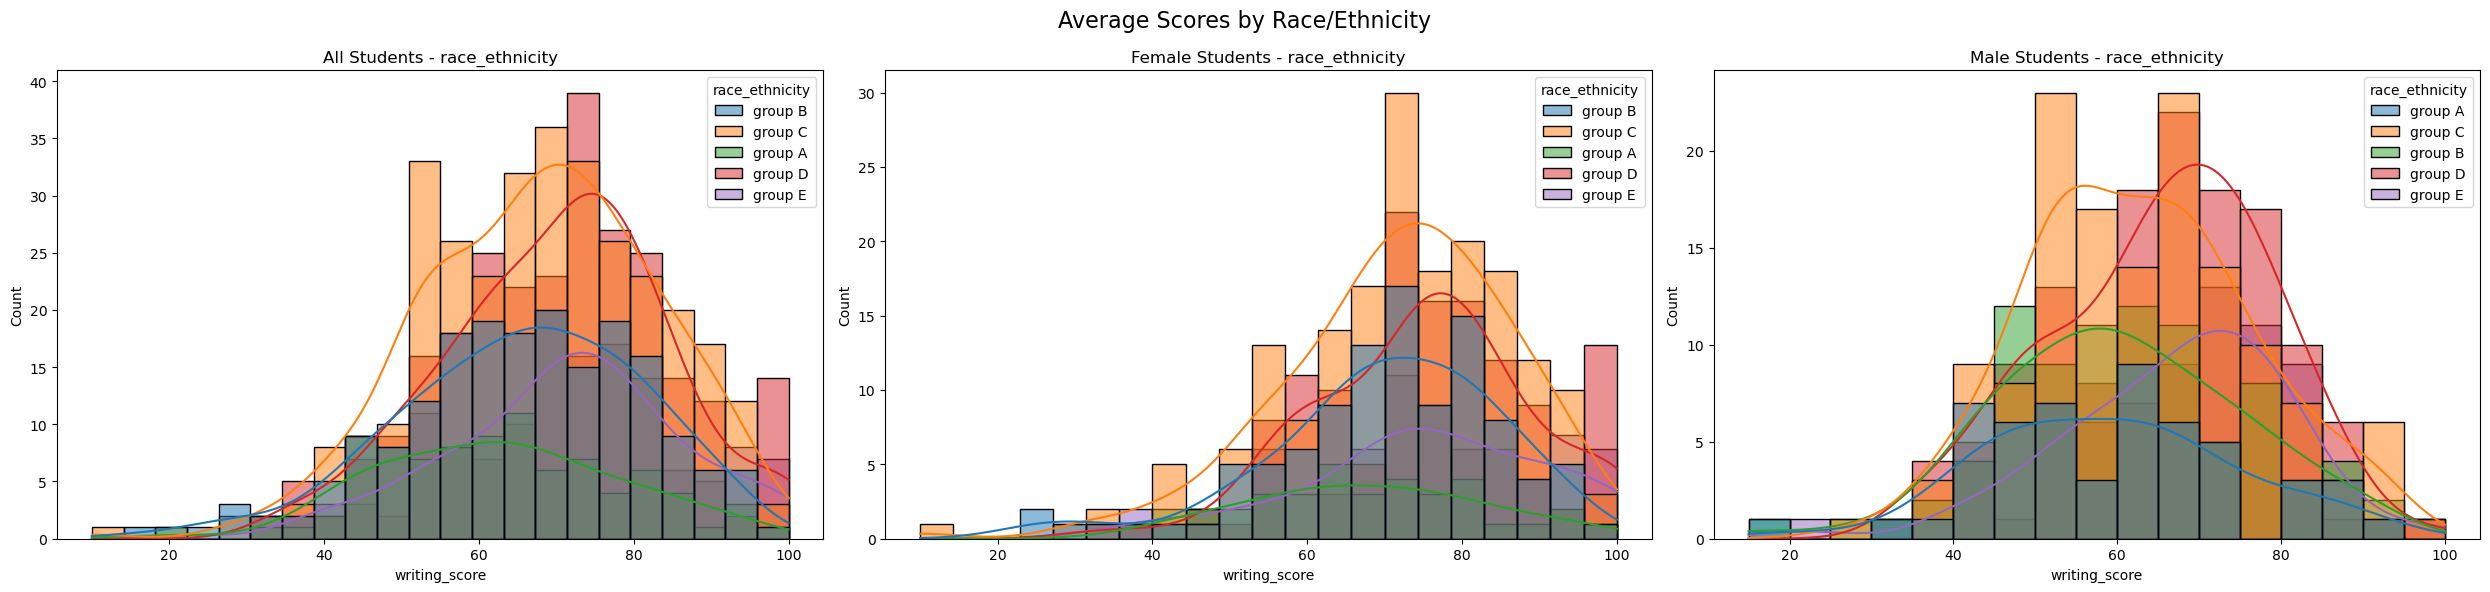

In [197]:
viz.hist_by_group(x='writing_score', hue='race_ethnicity', gender_split=True, main_title="Average Scores by Race/Ethnicity")


* Most students score math between 60 and 80 and in reading and writing wider range, between 50 and 80


## Multivariate analysis using pieplot

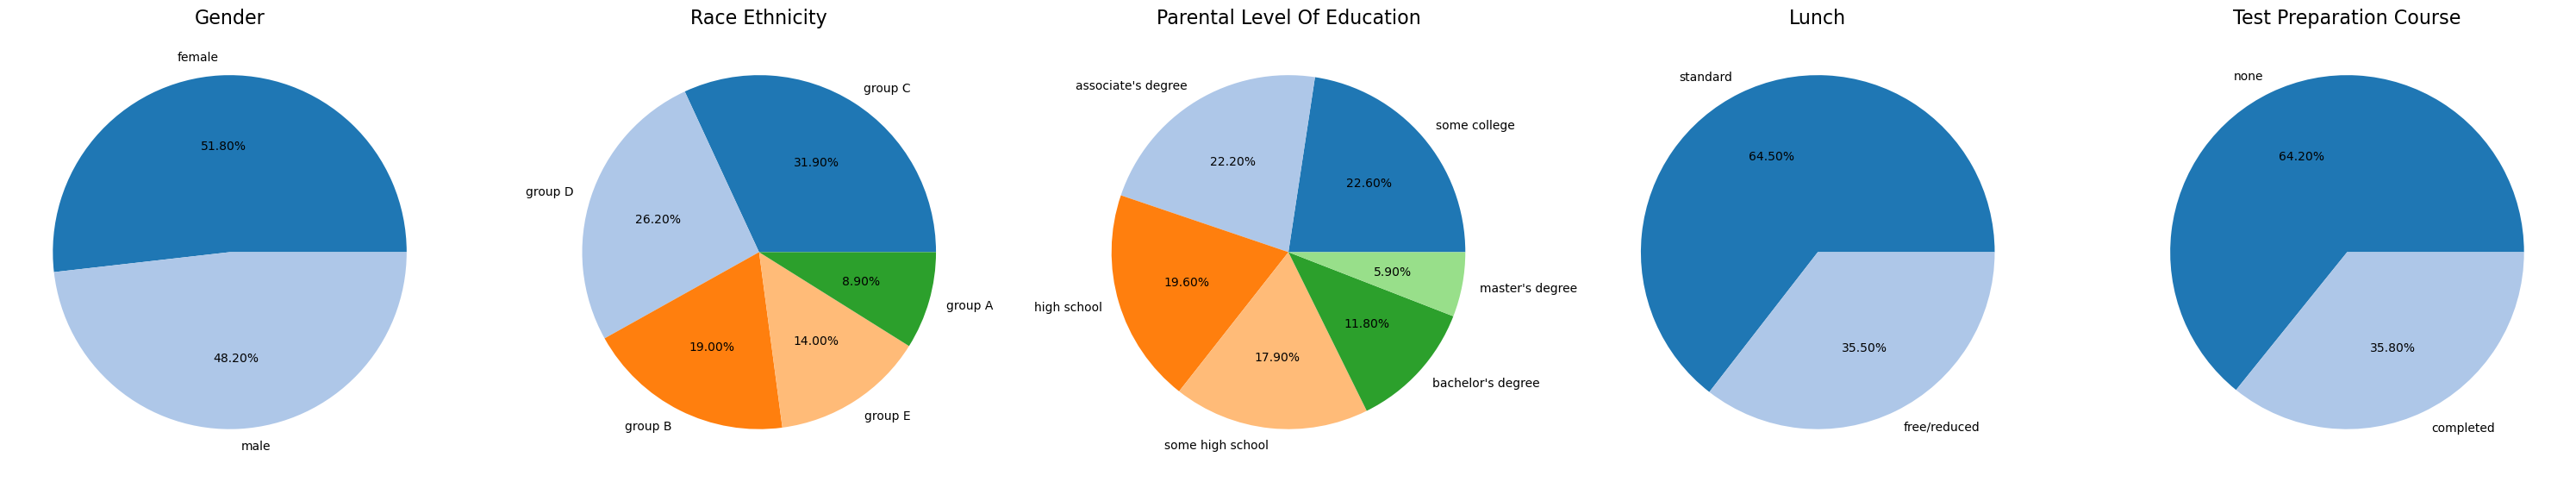

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


viz.plot_categorical_pies()

* Gender representation is balanced, so any analysis by gender should have enough data for both groups.
* Most students are in Group C and D, while Group A is underrepresented. Race/ethnicity may need weighting or careful consideration if used as a factor in modeling.
* The majority of students’ parents have mid-level education (some college or associate degrees). Very few have a master’s degree. Parental education may correlate with student performance
* Majority of students have standard lunch (64.5%), while 35.5% have free/reduced lunch.
* The dataset has a socioeconomic dimension; lunch type can be a proxy for income level.

### Box Plot

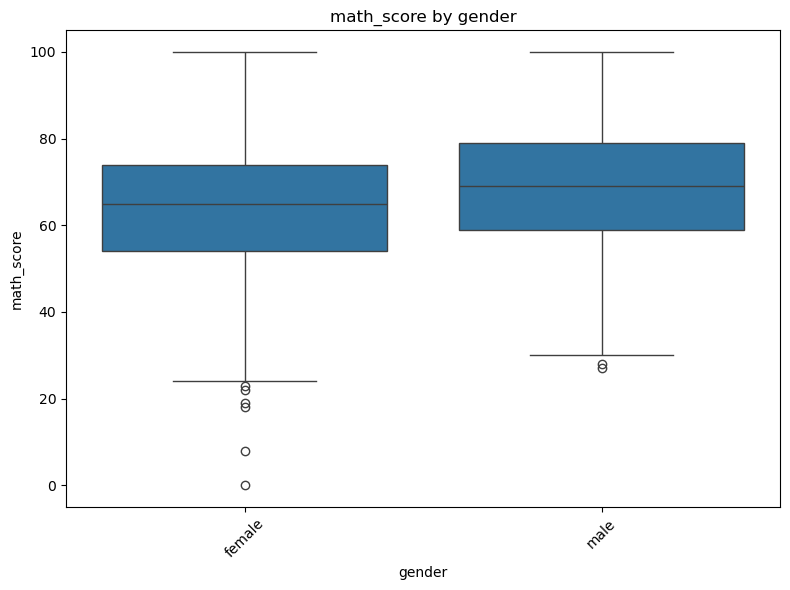

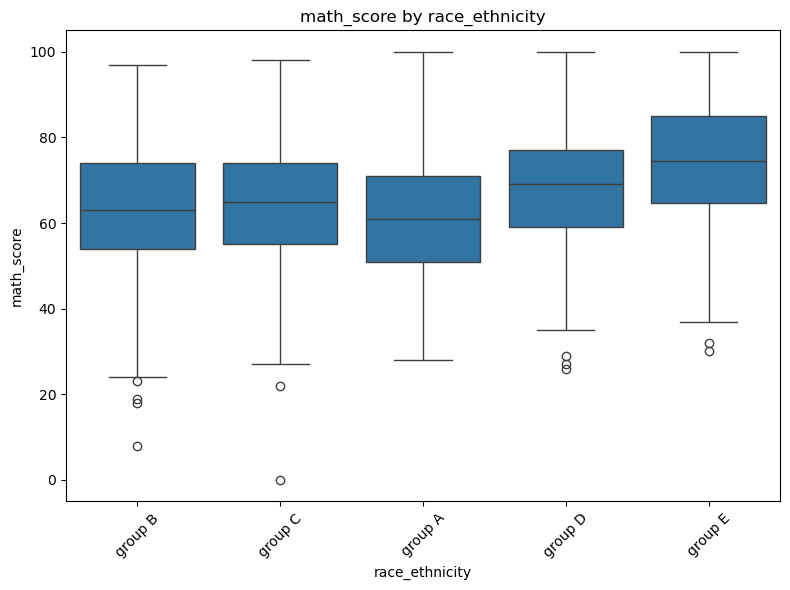

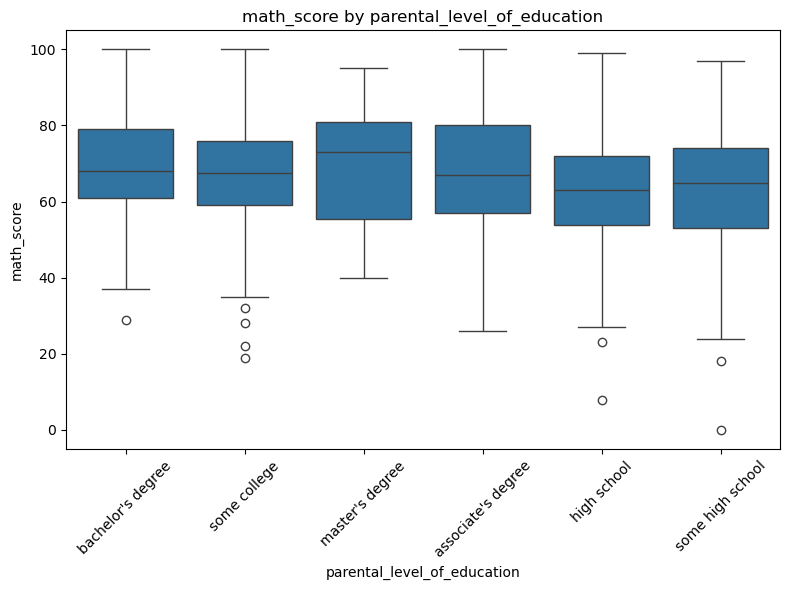

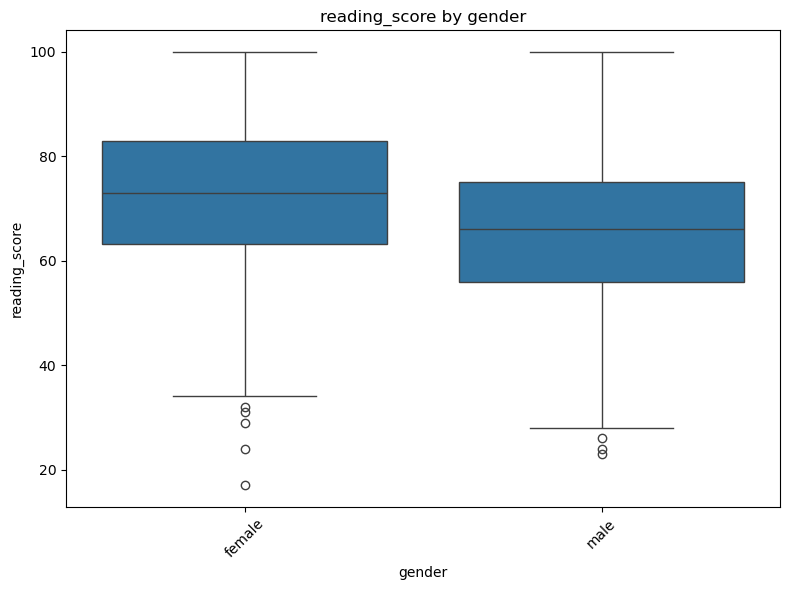

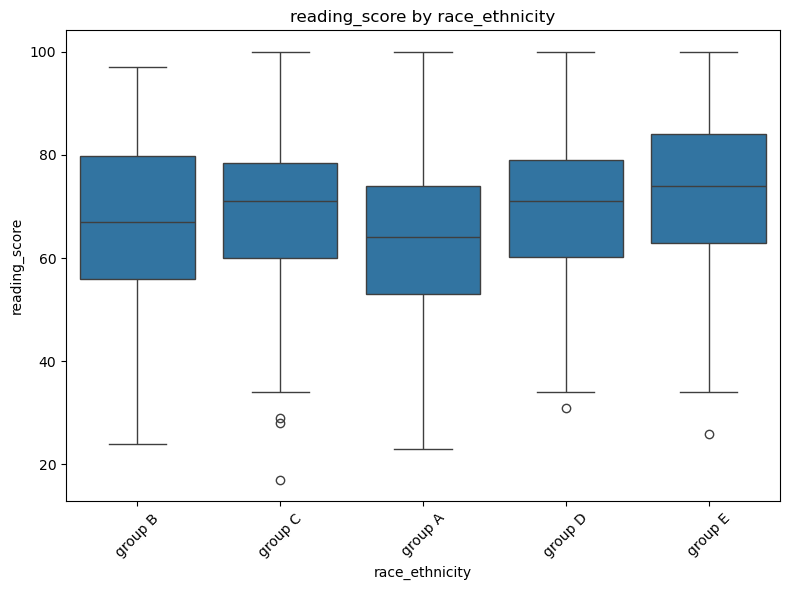

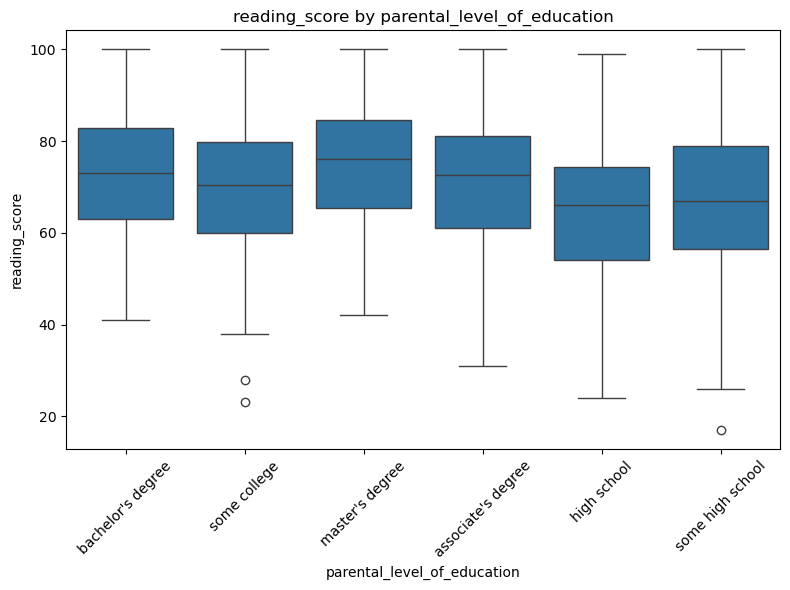

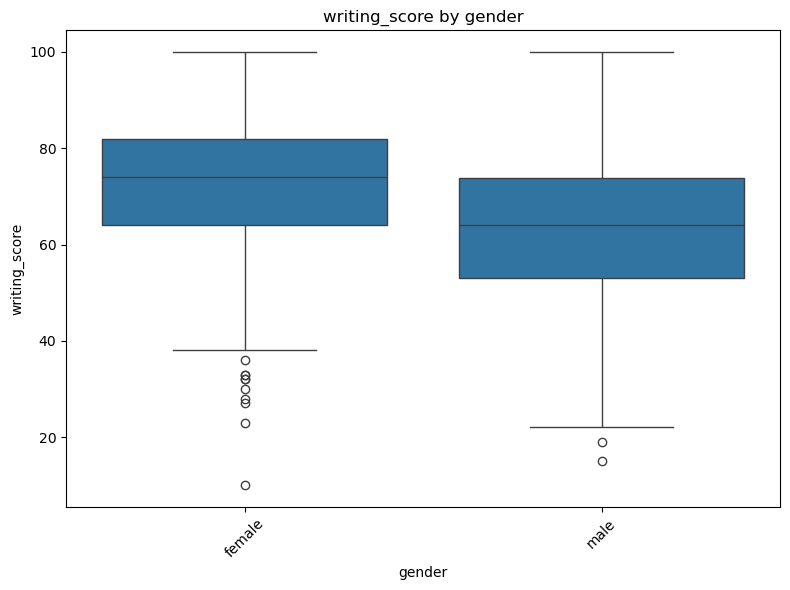

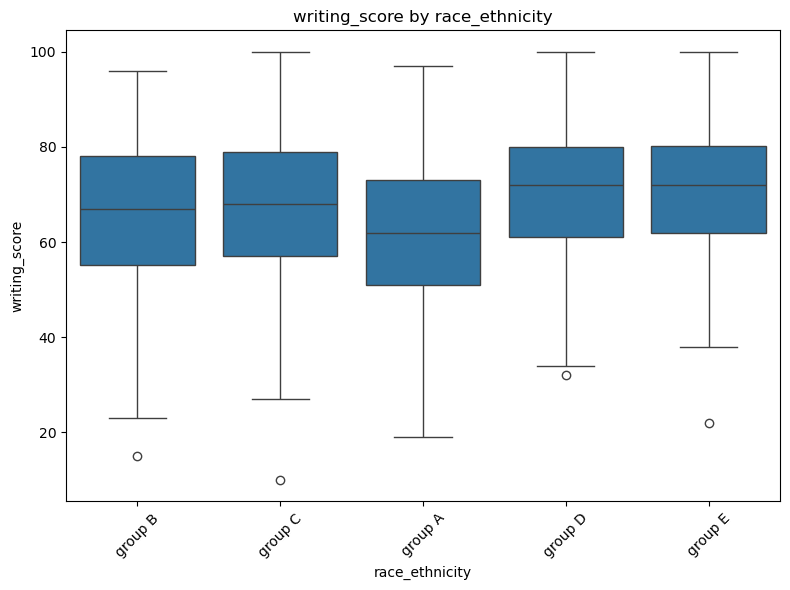

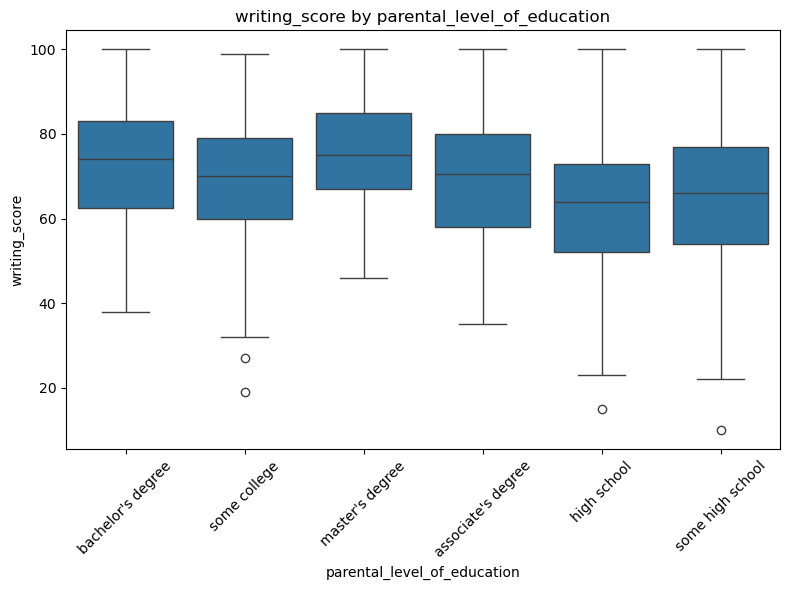

In [199]:
numeric_cols = ["math_score", "reading_score", "writing_score"]
group_by_cols = ["gender", "race_ethnicity", "parental_level_of_education"]

viz.plot_boxplots(numeric_cols, group_by_cols)

## 5. Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course